## loading image

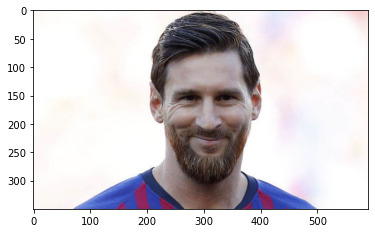

In [2]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
!pip install opencv-contrib-python
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import SGD
from PIL import Image
from PIL import ImageFilter
import cv2
import numpy as np
#Import image
image = cv2.imread("face.jpg")

#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


## convert image to gray scale

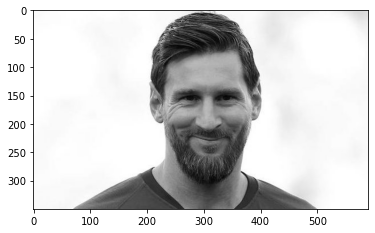

In [2]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.show()

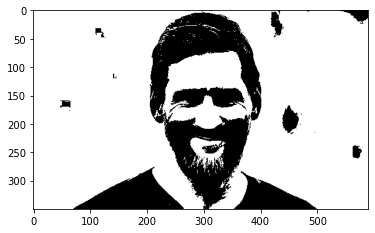

In [3]:
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
plt.show()

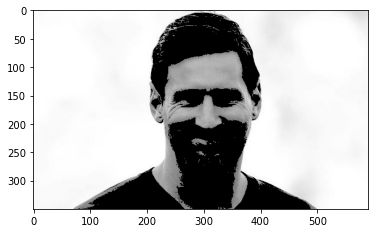

In [4]:
ok,thresh2=cv2.threshold(gray_image, 120, 255, cv2.THRESH_TOZERO)
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
plt.show()

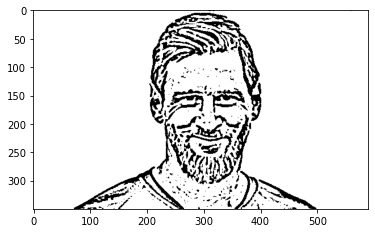

In [5]:
minValue = 70
frame=image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #gray scale
blur = cv2.GaussianBlur(gray,(5,5),2) #gaussian blur
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2) #adaptive inversion
ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #binary inversion
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

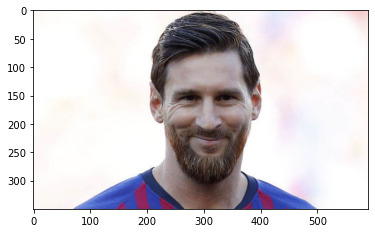

In [6]:
def process(image_name):
    image = cv2.imread(image_name)
    #Show the image with matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
process("face.jpg")

In [7]:
import cv2
def getFrames(file):
    vidcap=cv2.VideoCapture(file) #capture and read the video file
    success,image=vidcap.read()
    while success:
        cv2.imwrite("frame.png",image)
        process("frame.png") #this is the image processing function "process" where the frames are sent
        success,image=vidcap.read()
        break

In [9]:
!pip install moviepy
import moviepy.editor as mp

  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110726 sha256=117c30fb1f389c1c3b0513ec23b97130fa13788a7193a7a083cb0e95e88f3175
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e4\a4\db\0368d3a04033da662e13926594b3a8cf1aa4ffeefe570cfac1
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6147 sha256=995df8d0c8ebffa91101f5e3bf349362ee152a3606588f84494a88b001801432
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\22\82\ff\56950e4b223a69eda3a2bdeaef2ae4b274c3d1ced9b5814c99
Successfully built moviepy proglog
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


In [10]:
def getAudio(file):
    my_clip = mp.VideoFileClip(file)
    my_clip.audio.write_audiofile(r"finally.mp3")

In [11]:
def runApplication(fileName):
    getFrames(fileName)
    getAudio(fileName) #audio is written in finally.mp3 and sent to meetingOWL project [done]
runApplication("sample.mp4")

OSError: MoviePy error: the file sample.mp4 could not be found!
Please check that you entered the correct path.

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install keras
!pip install tensorflow
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#0 - thresholding
#1 - gray 


In [4]:
data = pd.read_csv('icml_face_data.csv')
#48 x 48

In [5]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [7]:
def driverFunction(data):
    data[' Usage'].value_counts()
    emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
    train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
    val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
    test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])
    train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
    train_images = train_images.astype('float32')/255
    val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
    val_images = val_images.astype('float32')/255
    test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
    test_images = test_images.astype('float32')/255
    train_labels = to_categorical(train_image_label)
    val_labels = to_categorical(val_image_label)
    test_labels = to_categorical(test_image_label)
    plot_all_emotions()
    plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')
    class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12,
                    batch_size=64)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('test caccuracy:', test_acc)
    pred_test_labels = model.predict(test_images)
    plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 104)

In [8]:
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

In [9]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [10]:
train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

In [11]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [12]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

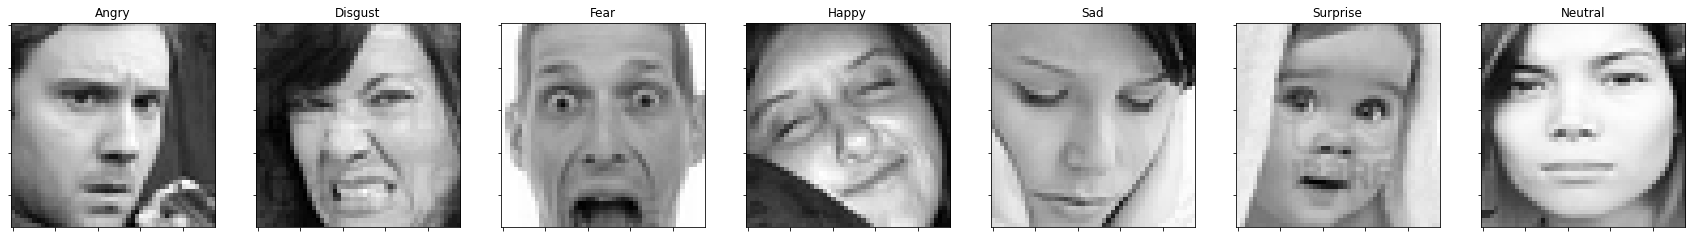

In [13]:
plot_all_emotions()

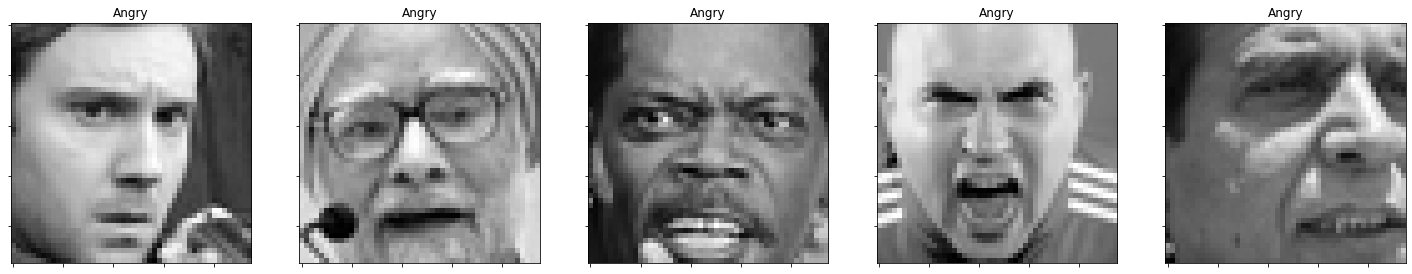

In [23]:
plot_examples(label=0)

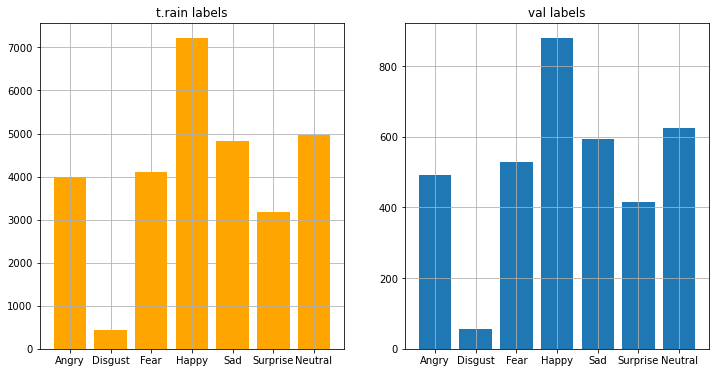

In [14]:
plot_compare_distributions(train_labels, val_labels, title1='t.rain labels', title2='val labels')

In [15]:
class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))

In [16]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [17]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [19]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12,
                    batch_size=64)

Epoch 1/12
449/449 [==============================] - 33s 72ms/step - loss: 0.2689 - accuracy: 0.3077 - val_loss: 1.5786 - val_accuracy: 0.4146
Epoch 2/12
449/449 [==============================] - 37s 82ms/step - loss: 0.2231 - accuracy: 0.4475 - val_loss: 1.4692 - val_accuracy: 0.4634
Epoch 3/12
449/449 [==============================] - 37s 82ms/step - loss: 0.2034 - accuracy: 0.4991 - val_loss: 1.3696 - val_accuracy: 0.4887
Epoch 4/12
449/449 [==============================] - 38s 84ms/step - loss: 0.1911 - accuracy: 0.5329 - val_loss: 1.3245 - val_accuracy: 0.5079
Epoch 5/12
449/449 [==============================] - 37s 82ms/step - loss: 0.1810 - accuracy: 0.5603 - val_loss: 1.2466 - val_accuracy: 0.5347
Epoch 6/12
449/449 [==============================] - 39s 87ms/step - loss: 0.1709 - accuracy: 0.5841 - val_loss: 1.2607 - val_accuracy: 0.5313
Epoch 7/12
449/449 [==============================] - 38s 84ms/step - loss: 0.1606 - accuracy: 0.6083 - val_loss: 1.2650 - val_accuracy:

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 1s 10ms/step - loss: 1.4388 - accuracy: 0.5534
test caccuracy: 0.5533574819564819


In [21]:
pred_test_labels = model.predict(test_images)

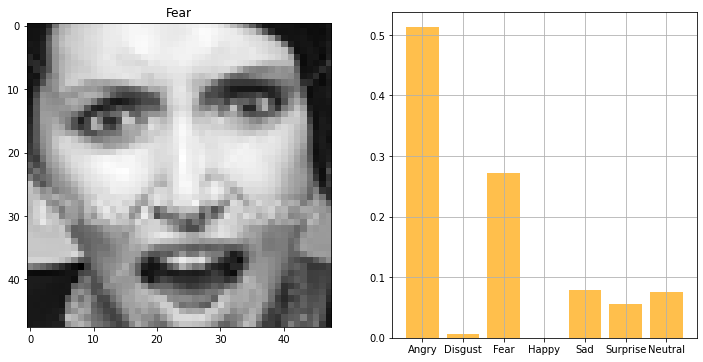

In [22]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 104)

In [23]:
def Grayscale(name1):
    img = Image.open(name1)
    imgGray = img.convert('L')
    imgGray.show()

In [24]:
def Binary_Thresholding(name1,val,maxi):
    image1 = cv2.imread(name1)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img,val,maxi, cv2.THRESH_BINARY)
    cv2.imshow('Binary Threshold', thresh1)
    cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)
    return np.array(thresh1)

In [25]:
def Truncated_Thresholding(name1,val,maxi):
    image1 = cv2.imread(name1)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(img,val,maxi,cv2.THRESH_TRUNC)
    cv2.imshow('Truncated Threshold', thresh2)

In [26]:
def Thresholding_To_Zero(name1,val = 120,maxi = 255):
    image1 = cv2.imread(name1)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh3 = cv2.threshold(img,val,maxi,cv2.THRESH_TOZERO)
    thresh3.show()
    #cv2.imshow('Threshold to zero', thresh3)

In [27]:
def invert(name1):
    image1 = cv2.imread(name1,0)
    inverted_image = np.invert(image1)
    cv2.imshow('Inverted Image',inverted_image)

In [28]:
def sharpen(name1):
    img = Image.open(name1)
    sharpened1 = img.filter(ImageFilter.SHARPEN);
    sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);
    sharpened3 = sharpened2.filter(ImageFilter.SHARPEN);
    sharpened3.show();

In [29]:
def blur(name1):
    img = Image.open(name1)
    blurred1 = img.filter(ImageFilter.BLUR);
    return np.array(blurred1);

In [30]:
def min(name1):
    img=Image.open(name1)
    img2=img.filter(ImageFilter.MinFilter(size=3))
    img2.show()

In [31]:
def max(name1):
    img=Image.open(name1)
    img2=img.filter(ImageFilter.MaxFilter(size=3))
    img2.show()

In [32]:
d={0:"Grey-scaling",1:"Thresholding",2:"Inversion",3:"Blurring"}
def GenerateCombinations(imageName, N):
     #number of different operations we have [greyscaling, thresholding etc
    operationsList=[]
    for j in range(0,32):
        if(N&(1<<j)):
            operationsList.append(d[j])
    for operations in operationsList:
        if(operations=="Grey-scaling"):
            Grayscale(imageName)
            pass

        elif(operations=="Thresholding"):
            Binary_Thresholding(imageName, 120, 255)
            pass
        elif(operations=="Inversion"):
            invert(imageName)
            pass
        elif(operations == "Blurring"):
            blur(imageName)
            pass
GenerateCombinations("face.jpg", 2)       

In [33]:
train_image_array

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[ 74.,  81.,  87

In [65]:
l = data[' pixels'].iloc[2].split()
x = []
for i in l:
    x.append(int(i))
x = np.array(x)
print(x)
#img = Image.fromarray((x * 255).astype(np.uint(8)))
img = Image.fromarray((x).astype(np.uint(8)))
if img.mode != 'RGB':
    img = img.convert('RGB')
img.save("dummy.jpg")
print(Binary_Thresholding("dummy.jpg", 140,255))

[231 212 156 ...  88 110 152]
[[255]
 [255]
 [255]
 ...
 [  0]
 [  0]
 [255]]


In [37]:
type(data[' pixels'].iloc[1])
l  = data[' pixels'].iloc[1].split()
np.array(l)

array(['151', '150', '147', ..., '193', '183', '184'], dtype='<U3')